Dataset path: C:\Users\AARYAMAN\.cache\kagglehub\datasets\giripujar\hr-analytics\versions\1
Files in dataset: ['HR_comma_sep.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count  

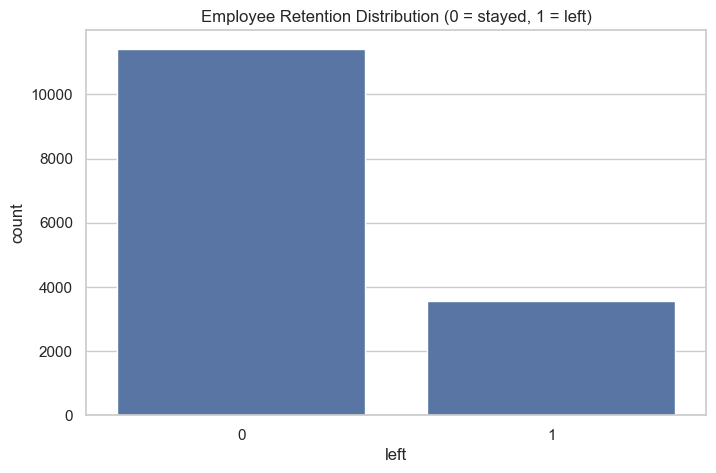

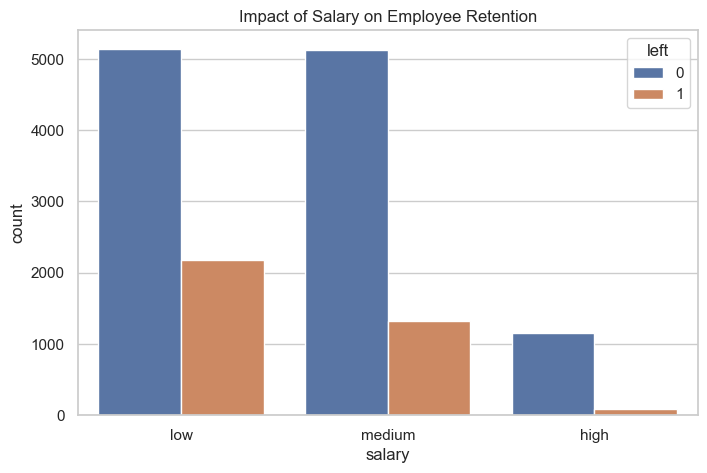

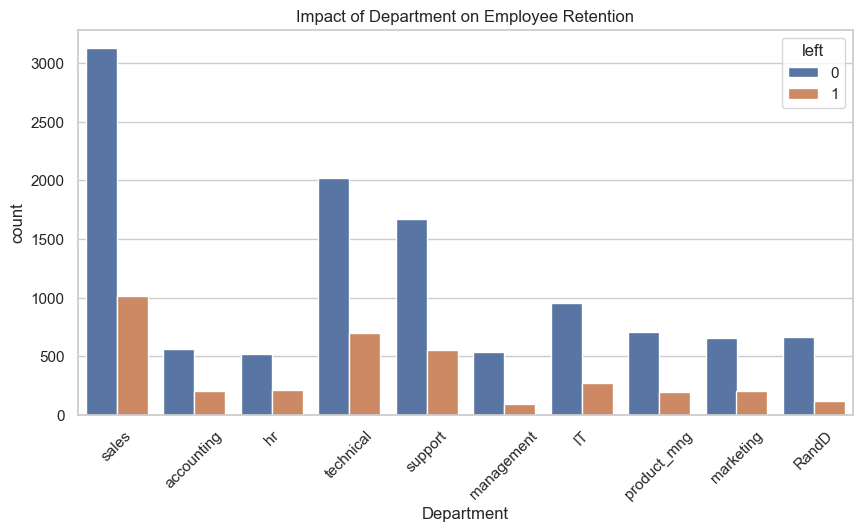

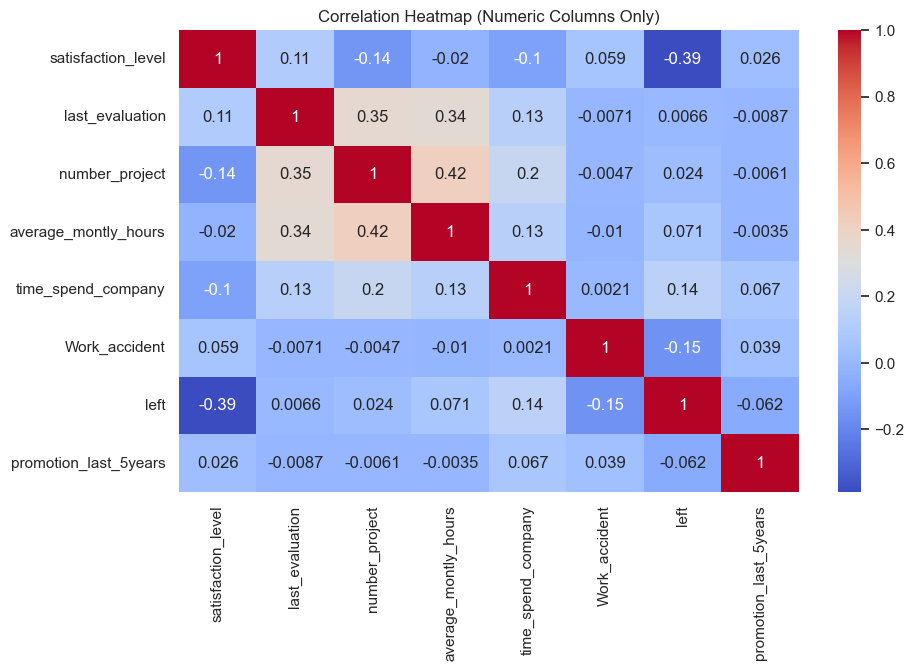

Accuracy: 0.783


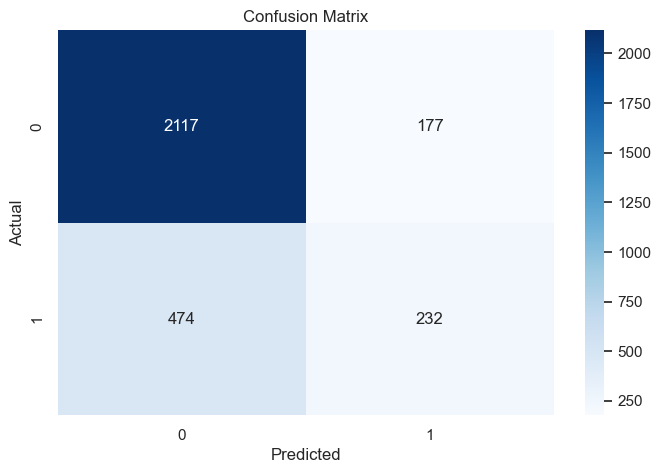

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.33      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.64      3000
weighted avg       0.76      0.78      0.76      3000



In [2]:
# ---------------------------
# Step 0: Imports
# ---------------------------
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

# ---------------------------
# Step 1: Download HR Analytics Dataset
# ---------------------------
path = kagglehub.dataset_download("giripujar/hr-analytics")
print("Dataset path:", path)
print("Files in dataset:", os.listdir(path))

# Load CSV
df = pd.read_csv(os.path.join(path, "HR_comma_sep.csv"))
df.head()

# ---------------------------
# Step 2: Exploratory Data Analysis (EDA)
# ---------------------------

# Basic info
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())

# Target distribution
sns.countplot(x='left', data=df)
plt.title("Employee Retention Distribution (0 = stayed, 1 = left)")
plt.show()

# Salary vs Retention
sns.countplot(x='salary', hue='left', data=df)
plt.title("Impact of Salary on Employee Retention")
plt.show()

# Department vs Retention
plt.figure(figsize=(10,5))
sns.countplot(x='Department', hue='left', data=df)
plt.xticks(rotation=45)
plt.title("Impact of Department on Employee Retention")
plt.show()

# Correlation heatmap (numeric columns only)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

# ---------------------------
# Step 3: Prepare data for Logistic Regression
# ---------------------------

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['salary','Department'], drop_first=True)

# Split dataset
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# ---------------------------
# Step 4: Logistic Regression Model
# ---------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ---------------------------
# Step 5: Model Evaluation
# ---------------------------

# Accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
